## Problem Brief : Given online transaction data, determine if transaction was fraud or a legit one.

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import gc
import random

In [94]:
# function definition that is used in this kernel

def changeDType(df,flag=False):
    
    if(flag):
        numericDtype = ['int32','int64','float64','float32']
    
    for i in df.columns:
        if (df[i].dtype == 'int64' or df[i].dtype == 'int32'):
            df[i] = pd.to_numeric(df[i],downcast='integer')
        
        if (df[i].dtype == 'float64' or df[i].dtype == 'float32'):
            df[i] = pd.to_numeric(df[i],downcast='float')
            

def showMaxRC():
    pd.set_option('display.max_column',None)
    pd.set_option('display.max_row',None)

def discreteGraph(dis_cols):
    
    fig = plt.figure(figsize = (20, 15))
    
    index = 1
    for col in dis_cols:
        plt.subplot(3, 2, index)
        sns.countplot(x=col, data=train1)
        index += 1
    plt.tight_layout()
    plt.show()
    
def getCategoricalColumns(df):
    categorical_cols = []

    for i in df.columns:
        if(df[i].dtype == 'o' or  df[i].dtype =='O'):
            categorical_cols.insert(-1,i)
    return categorical_cols

        
def getNumericalColumns(df):
    numerical_cols = []
    
    for i in df.columns:
        if(df[i].dtype!='o' and df[i].dtype!='O'):
            numerical_cols.insert(-1,i)
    
    return numerical_cols

In [3]:
# loading data
df = pd.read_csv('../input/its-a-fraud/train.csv')

In [4]:
# reducing data size by changing data types  

gc.collect()
changeDType(df,False)
showMaxRC()

## Data exploration

In [5]:
# shape of the data
print(f'total {df.shape[0]} data points\ntotal {df.shape[1]} features')

total 442905 data points
total 434 features


In [6]:
# Bird's eye view of dataset 
df.sample(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
291884,3532693,0,14406607,160.500000,W,8135,247.0,150.0,visa,226.0,credit,433.0,87.0,NaN,NaN,gmail.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,3.0,T,F,F,M0,T,F,F,F,T,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16724,3416686,0,10863942,15.000000,W,7919,194.0,150.0,mastercard,166.0,debit,325.0,87.0,2433.0,

**target column** <br/>1 - transaction is fraud<br/>0 - transaction is legitimate


In [7]:
df['isFraud'].value_counts()

0    427408
1     15497
Name: isFraud, dtype: int64

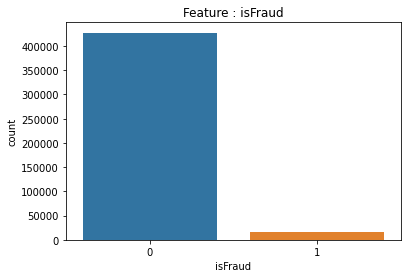

In [8]:
sns.countplot(data=df,x='isFraud')
plt.title("Feature : isFraud")
plt.show()

In [9]:
totalFraud = (df['isFraud']==1).sum()
totalDPoints = len(df['isFraud'])

print(f'\nFraud % : {(totalFraud/totalDPoints)*100}\n\nNon Fraud % : {100 - (totalFraud/totalDPoints)*100}')

# almost 97% datapoints are Not a fraud,
# while only 3% datapoints is fraud


Fraud % : 3.4989444689041664

Non Fraud % : 96.50105553109583


In [10]:
print("Almort 97% data points are legitimate transaction\nWhile only 3% datapoints are fraud\n\nData is higly imbalance")

Almort 97% data points are legitimate transaction
While only 3% datapoints are fraud

Data is higly imbalance


In [11]:
# identify name of categorical and numerical cols

categorical_cols = []

for i in df.columns:
    if(df[i].dtype == 'o' or  df[i].dtype =='O'):
        categorical_cols.insert(-1,i)
        
numerical_cols = []
for i in df.columns:
    if(i not in categorical_cols):
        numerical_cols.insert(-1,i)
        

print(f'\nTotal categorical features : {len(categorical_cols)}')
print(f'\nTotal numerical features : {len(numerical_cols)}')


Total categorical features : 31

Total numerical features : 403


In [12]:
gc.collect()

2732

**Plotting graphs for categorical data**

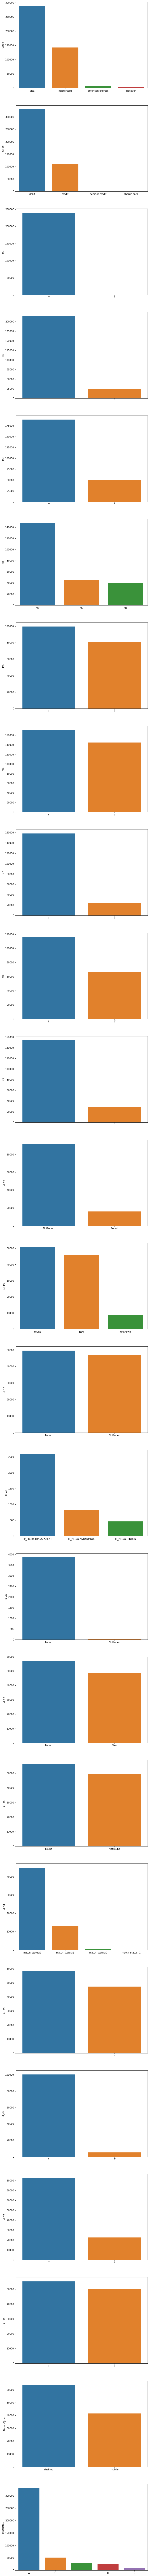

In [13]:
#  plot histogram for all the categorical data 

fig,axes = plt.subplots(25,figsize=(10,200))


yp = 0
for i in categorical_cols:
    y = df[i].value_counts().index
    x = df[i].value_counts()
    if(len(y)<8):
        sns.barplot(x=y,y=x,ax=axes[yp])
        yp+=1



**All the features have too many Missing values :(**

In [15]:
# null values in categorical data
df[categorical_cols].isnull().sum()

card4              1191
card6              1185
P_emaildomain     70931
R_emaildomain    340177
M1               203382
M2               203382
M3               203382
M4               211147
M5               262741
M6               126786
M7               259844
M8               259834
M9               259834
id_12            334928
id_15            337369
id_16            346075
id_23            439035
id_27            439035
id_28            337376
id_29            337376
id_30            384812
id_31            337874
id_33            388050
id_34            384636
id_35            337369
id_36            337369
id_37            337369
id_38            337369
DeviceType       337504
DeviceInfo       353982
ProductCD             0
dtype: int64

In [16]:
for i in categorical_cols:
    print('\n',i,'=====\n\nnull : ',df[i].isnull().sum())
    print(df[i].value_counts())


 card4 =====

null :  1191
visa                288368
mastercard          142101
american express      6274
discover              4971
Name: card4, dtype: int64

 card6 =====

null :  1185
debit              329967
credit             111718
debit or credit        24
charge card            11
Name: card6, dtype: int64

 P_emaildomain =====

null :  70931
gmail.com           171189
yahoo.com            75850
hotmail.com          33909
anonymous.com        27702
aol.com              21257
comcast.net           5831
icloud.com            4719
outlook.com           3767
msn.com               3072
att.net               3044
live.com              2301
sbcglobal.net         2186
verizon.net           2014
ymail.com             1782
bellsouth.net         1440
yahoo.com.mx          1157
me.com                1130
cox.net               1059
optonline.net          749
charter.net            615
live.com.mx            565
rocketmail.com         471
mail.com               425
earthlink.net         

**features with the name M[1-9] all of them are having value like  (T/F/null) and (M0,M1,M2)**
            
**also all of them having > 49% data as null so drop them because i dont have even knowledge about what this features are**
            

**too many null values for almost all the features some of the features are not relevant at all with what our task in like**
- id_33 which is screen resolution
- Operating system which system uses
- Device type using which payment was made  etc.
            

In [17]:
gc.collect()

142

## Data distribution analysis and relationship inference

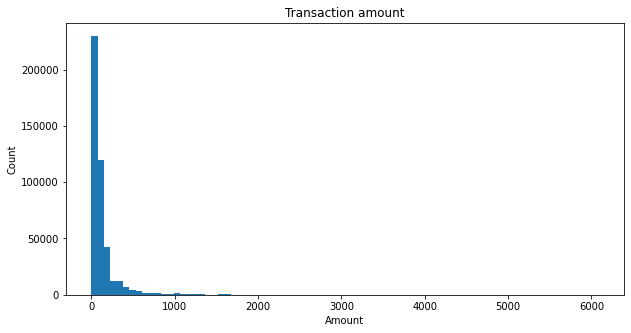

count    442905.000000
mean        135.273697
std         232.955215
min           0.251000
25%          43.743999
50%          68.949997
75%         125.000000
max        6085.229980
Name: TransactionAmt, dtype: float64 




In [18]:
# print('Transaction Amount Range : ',df['TransactionAmt'].min() ,' -- ',df['TransactionAmt'].max())
plt.figure(figsize=(10,5))
plt.xlabel("Amount")
plt.ylabel("Count")
plt.title("Transaction amount")
plt.hist(data=df,x='TransactionAmt',bins=80,)
plt.show()

print(df['TransactionAmt'].describe(),'\n\n')

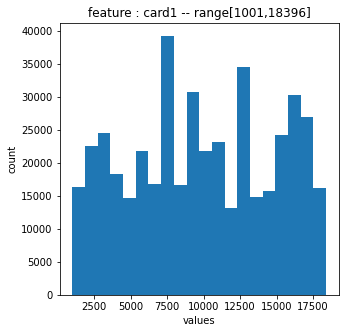

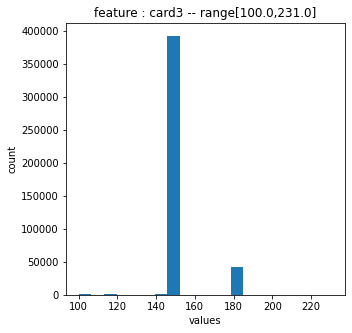

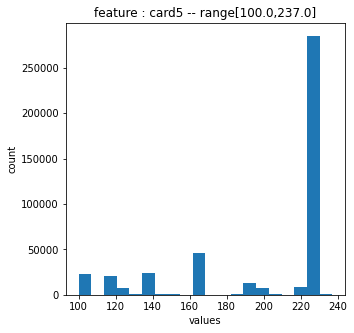

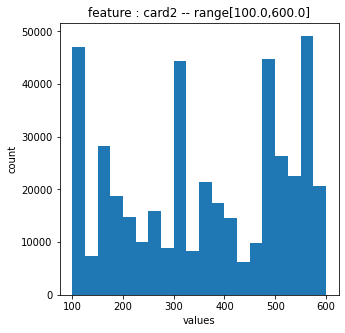

In [19]:
cards = ['card1','card3','card5','card2']

for i in cards:
    plt.figure(figsize=(5,5))
    plt.ylabel("count")
    plt.xlabel("values")
    plt.title(f"feature : {i} -- range[{df[i].min()},{df[i].max()}]")
    plt.hist(data=df,x=i,bins=20)

- For some features data distribution is very skewed

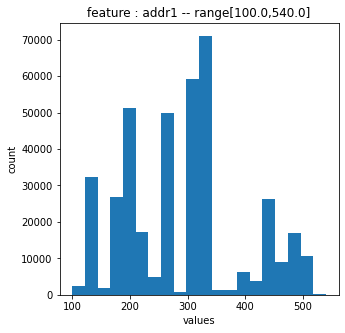

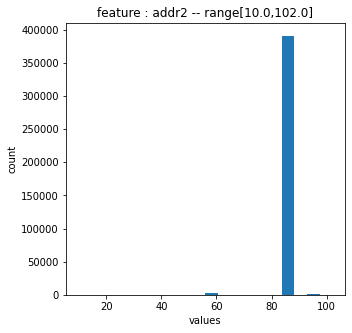

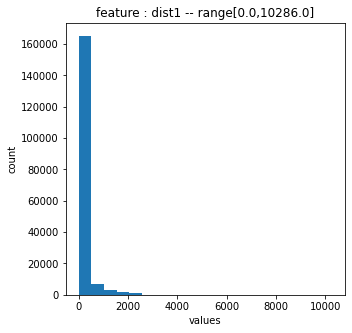

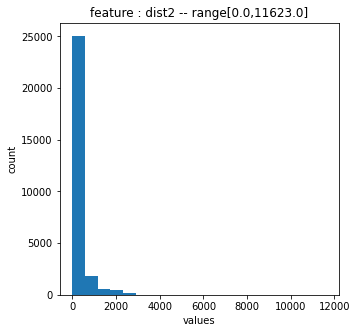

In [20]:

cards = ['addr1','addr2','dist1','dist2']

for i in cards:
    plt.figure(figsize=(5,5))
    plt.ylabel("count")
    plt.xlabel("values")
    plt.title(f"feature : {i} -- range[{df[i].min()},{df[i].max()}]")
    plt.hist(data=df,x=i,bins=20)

plt.show()

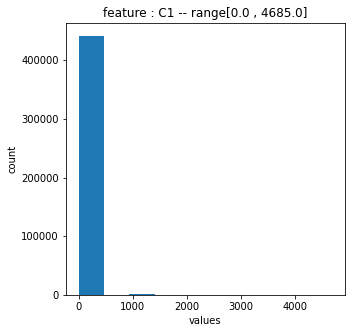

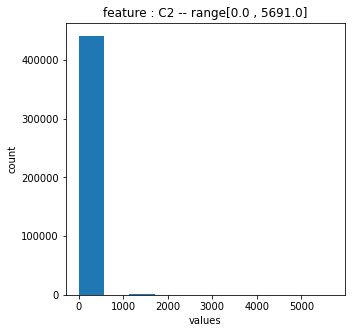

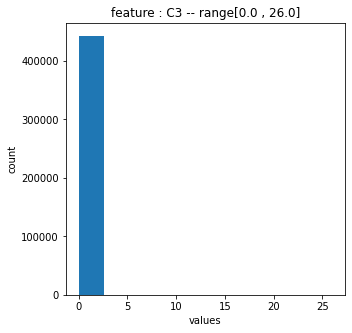

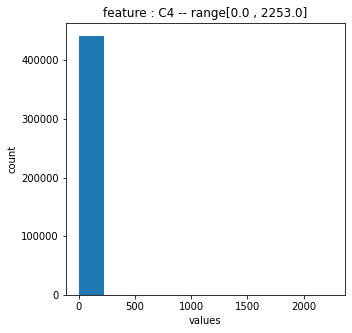

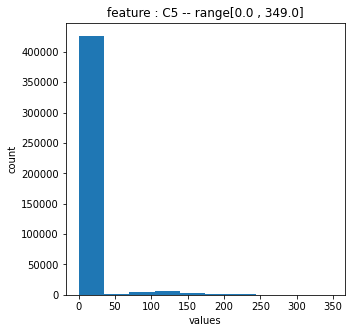

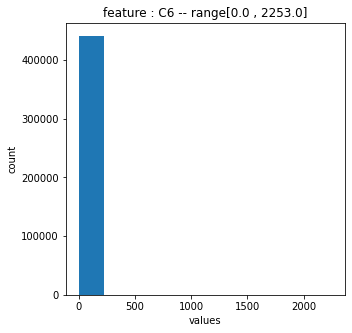

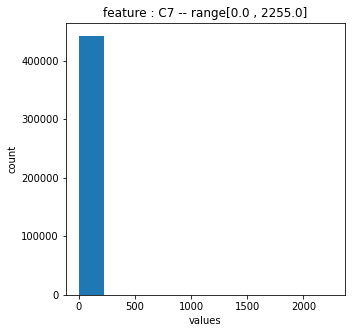

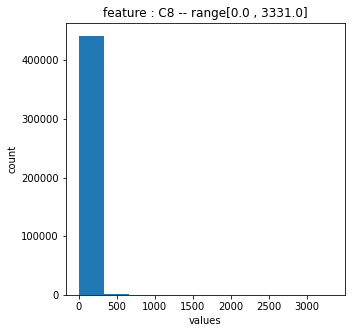

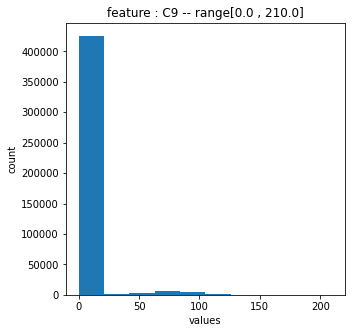

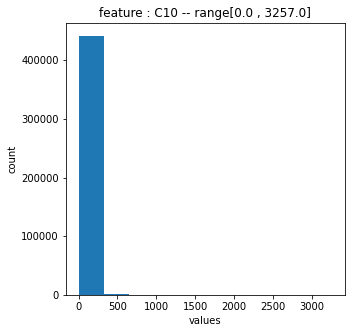

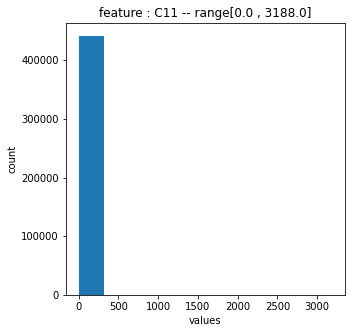

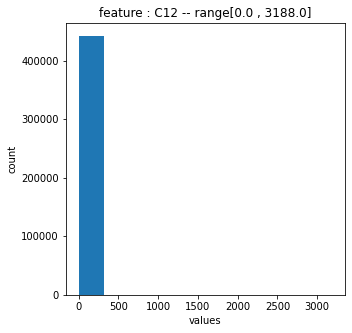

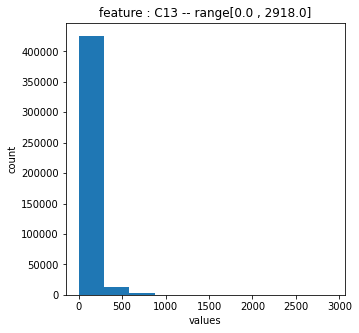

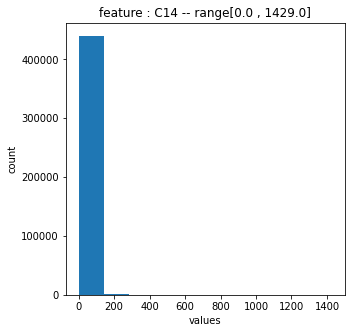

In [21]:
for i in range(1,15):
    plt.figure(figsize=(5,5))
    plt.ylabel("count")
    plt.xlabel("values")
    plt.title(f"feature : C{i} -- range[{df['C'+str(i)].min()} , {df['C'+str(i)].max()}]")
    plt.hist(data=df,x="C"+str(i))
plt.show()

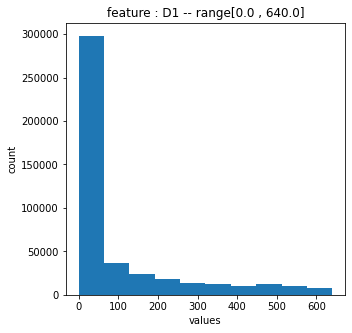

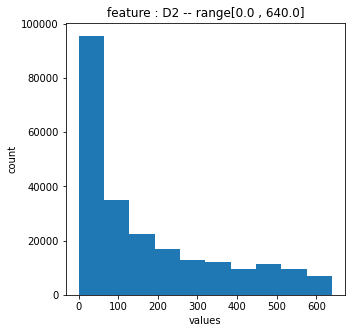

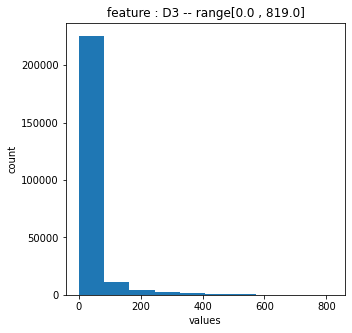

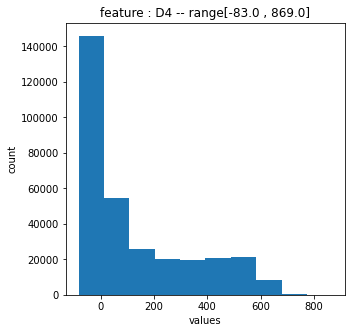

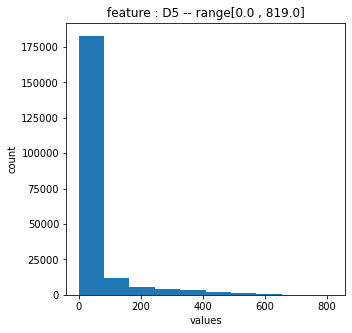

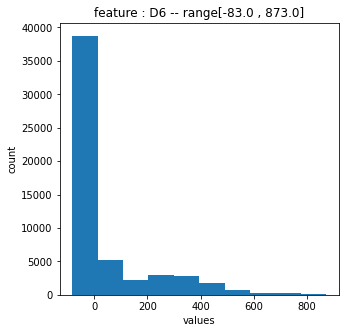

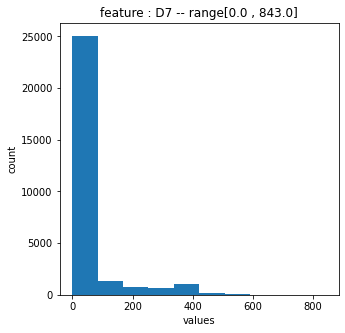

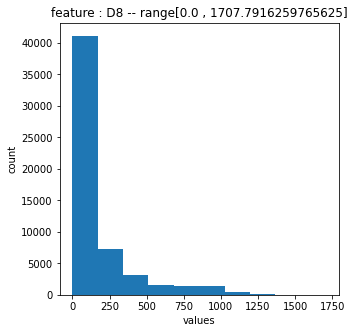

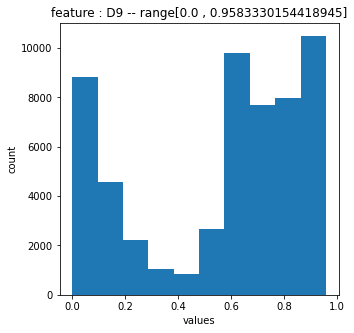

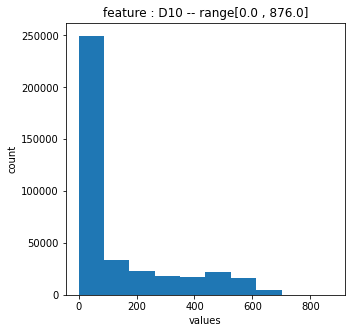

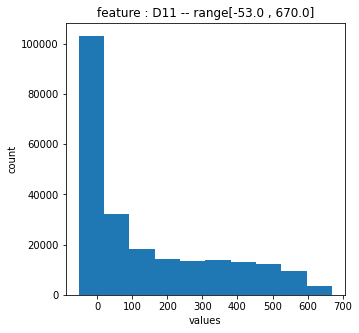

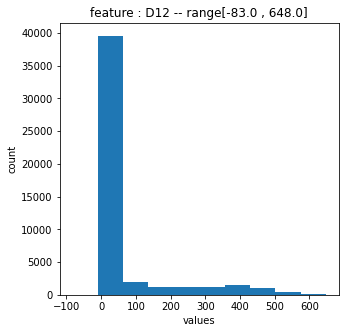

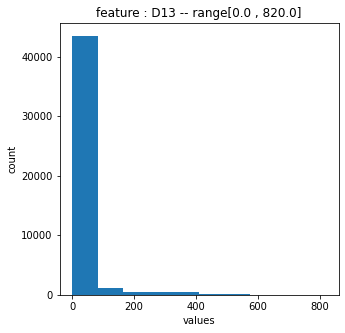

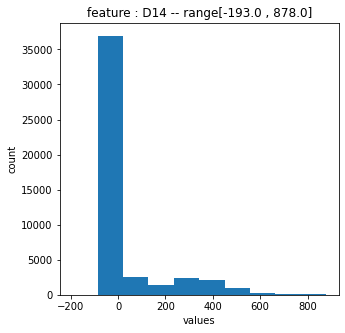

In [22]:
for i in range(1,15):
    plt.figure(figsize=(5,5))
    plt.ylabel("count")
    plt.xlabel("values")
    plt.title(f"feature : D{i} -- range[{df['D'+str(i)].min()} , {df['D'+str(i)].max()}]")
    plt.hist(data=df,x="D"+str(i))
plt.show()

## Relation ship between certain features and target columns visualization

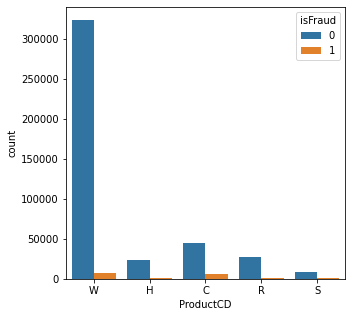

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='ProductCD',hue='isFraud')
plt.show()

- **Product with code W is the most susceptible to fraud transaction**

In [24]:
print('Missing product code - fraud constitute out of total fraud % : ',100*(df[df['ProductCD'].isnull()]['isFraud']==1).sum()/(df['isFraud']==1).sum())
print('**************************************************')
for col in df['ProductCD'].value_counts().index:
    print(col,'- fraud constitute out of total fraud % : ',100*(df[df['ProductCD']==col]['isFraud']==1).sum()/(df['isFraud']==1).sum())
    print('**************************************************')



Missing product code - fraud constitute out of total fraud % :  0.0
**************************************************
W - fraud constitute out of total fraud % :  43.40194876427696
**************************************************
C - fraud constitute out of total fraud % :  38.67200103245789
**************************************************
R - fraud constitute out of total fraud % :  6.949732206233464
**************************************************
H - fraud constitute out of total fraud % :  7.678905594631219
**************************************************
S - fraud constitute out of total fraud % :  3.2974124024004645
**************************************************


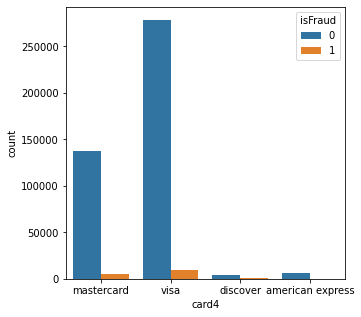

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='card4',hue='isFraud')
plt.show()

- **Transaction made using visa card constitute majority fraud**

In [26]:
print('Missing card company - fraud constitute out of total fraud % : ',100*(df[df['card4'].isnull()]['isFraud']==1).sum()/(df['isFraud']==1).sum())
print('**************************************************')
for col in df['card4'].value_counts().index:
    print(col,'- fraud constitute out of total fraud % : ',100*(df[df['card4']==col]['isFraud']==1).sum()/(df['isFraud']==1).sum())
    print('**************************************************')


Missing card company - fraud constitute out of total fraud % :  0.22585016454797702
**************************************************
visa - fraud constitute out of total fraud % :  64.21888107375621
**************************************************
mastercard - fraud constitute out of total fraud % :  31.799703168355165
**************************************************
american express - fraud constitute out of total fraud % :  1.1937794411821643
**************************************************
discover - fraud constitute out of total fraud % :  2.5617861521584824
**************************************************


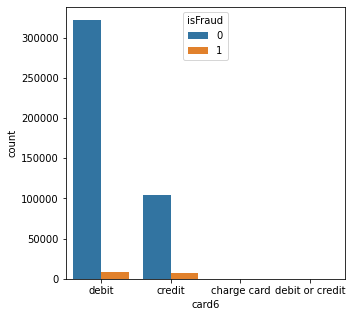

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='card6',hue='isFraud')
plt.show()

In [28]:
print('Missing card type - fraud constitute out of total fraud % : ',100*(df[df['card6'].isnull()]['isFraud']==1).sum()/(df['isFraud']==1).sum())
print('**************************************************')
for col in df['card6'].value_counts().index:
    print(col,'- fraud constitute out of total fraud % : ',100*(df[df['card6']==col]['isFraud']==1).sum()/(df['isFraud']==1).sum())
    print('**************************************************')


Missing card type - fraud constitute out of total fraud % :  0.2193973027037491
**************************************************
debit - fraud constitute out of total fraud % :  51.75195199070788
**************************************************
credit - fraud constitute out of total fraud % :  48.02865070658837
**************************************************
debit or credit - fraud constitute out of total fraud % :  0.0
**************************************************
charge card - fraud constitute out of total fraud % :  0.0
**************************************************


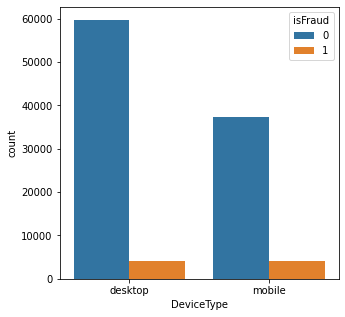

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='DeviceType',hue='isFraud')
plt.show()

In [30]:
print('Missing device type - fraud constitute out of total fraud % : ',100*(df[df['DeviceType'].isnull()]['isFraud']==1).sum()/(df['isFraud']==1).sum())
print('**************************************************')
for col in df['DeviceType'].value_counts().index:
    print(col,'- fraud constitute out of total fraud % : ',100*(df[df['DeviceType']==col]['isFraud']==1).sum()/(df['isFraud']==1).sum())
    print('**************************************************')




Missing device type - fraud constitute out of total fraud % :  45.737884751887464
**************************************************
desktop - fraud constitute out of total fraud % :  27.08266116022456
**************************************************
mobile - fraud constitute out of total fraud % :  27.17945408788798
**************************************************


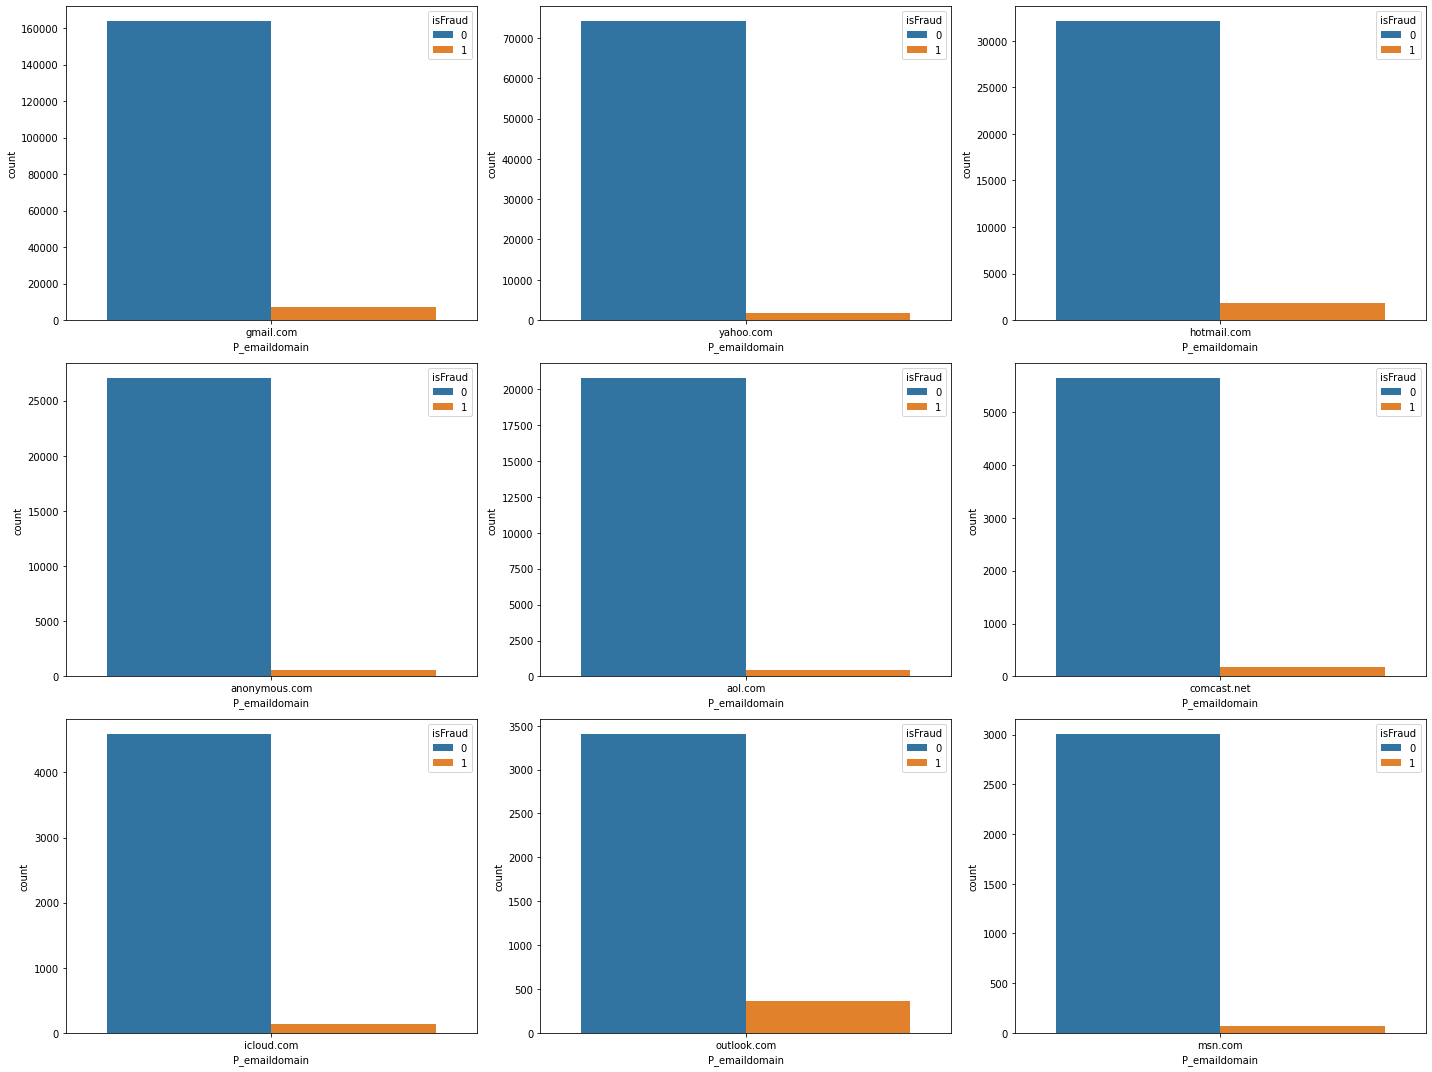

In [33]:

cols = df['P_emaildomain'].value_counts()[df['P_emaildomain'].value_counts().values > 3044].index
fig = plt.figure(figsize=(20,15))

index=1

for col in cols:
    plt.subplot(3,3,index)
    sns.countplot(data=df[df['P_emaildomain']==col],x='P_emaildomain',hue='isFraud')
    index+=1

plt.tight_layout()
plt.show()



- **gmail.com seems to be the most used emaildomain by fraudster...which can be to mask its activiy**

In [34]:
print('Missing purchaser email domain - fraud constitute out of total fraud % : ',100*(df[df['P_emaildomain'].isnull()]['isFraud']==1).sum()/(df['isFraud']==1).sum())
print('**************************************************')
for col in df['P_emaildomain'].value_counts().index:
    print(col,'- fraud constitute out of total fraud % : ',100*(df[df['P_emaildomain']==col]['isFraud']==1).sum()/(df['isFraud']==1).sum())
    print('**************************************************')




Missing purchaser email domain - fraud constitute out of total fraud % :  13.563915596567078
**************************************************
gmail.com - fraud constitute out of total fraud % :  47.98993353552301
**************************************************
yahoo.com - fraud constitute out of total fraud % :  11.137639543137382
**************************************************
hotmail.com - fraud constitute out of total fraud % :  11.673227076208299
**************************************************
anonymous.com - fraud constitute out of total fraud % :  4.078208685552043
**************************************************
aol.com - fraud constitute out of total fraud % :  3.0909208233851713
**************************************************
comcast.net - fraud constitute out of total fraud % :  1.1873265793379364
**************************************************
icloud.com - fraud constitute out of total fraud % :  0.838872039749629
******************************************

## Data Preprocessing and cleaning feature engineering

In [35]:
fullCorr = df.corr()

In [36]:

corr = fullCorr[1:2]

In [38]:
# del dfCopy
gc.collect()

23

In [40]:
# least correlated features, we have set thresold of minimum correlation 0.01>=

least_corr=[]
for col in corr.columns:
    if(abs(corr[col].values[0])<0.01) :
        least_corr.append(col)
# least_corr
        

In [41]:
fullCorr.drop('isFraud',axis=1,inplace=True)
fullCorr.drop('isFraud',axis=0,inplace=True)

In [42]:
upper = fullCorr.where(np.triu(np.ones(fullCorr.shape), k=1).astype(bool))

In [43]:
# if two columns are highly correlated then drop one of them
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [44]:
# preparing list of columns that will be left after dropping highly correlated columns

res_list = []
for i in df.columns:
    if i not in to_drop :
        res_list.append(i)

In [45]:
# dropped columns that has least correlation

res_list2 = []
for i in res_list:
    if i not in least_corr :
        res_list2.append(i)

In [46]:
df2 = df[res_list2].copy(deep=True)

In [47]:
df2.shape

(442905, 248)

**Dropped features with large no. of null values and features with least correlation**

In [48]:
df.shape

(442905, 434)

In [49]:
# count nulls in filtered data frame

count_of_null =[]
for i in df2.columns :
    if(df2[i].isnull().sum()>((30*len(df2))/100)) :
        count_of_null.append(i)

**will be dropping of features with # NaN > 30%**

In [50]:
# dropping off columns with too many nulls
for i in df2.columns:
    if(i in count_of_null):
        df2.drop(i,axis=1,inplace=True)
        

In [51]:
df2.shape

(442905, 111)

In [52]:
df.sample(4)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
384159,3392354,0,10247947,59.000000,W,18268,583.0,150.0,visa,226.0,credit,337.0,87.0,NaN,NaN,gmail.com,NaN,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,NaN,NaN,254.0,254.0,NaN,NaN,NaN,NaN,254.0,0.0,NaN,NaN,NaN,254.0,T,T,T,M0,F,T,F,F,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160502,3035523,0,1150368,27.969999,W,16146,532.0,150.0,mastercard,224.0,debit,498.0,87.0,NaN,NaN,sbcglobal.

In [53]:
categorical_cols = []

for i in df2.columns:
    if(df2[i].dtype == 'o' or  df2[i].dtype =='O'):
        categorical_cols.insert(-1,i)

In [54]:
df2[categorical_cols].isnull().sum()

card4              1191
card6              1185
P_emaildomain     70931
M6               126786
ProductCD             0
dtype: int64

In [57]:
least_email_domain =[]
val_counts = df['P_emaildomain'].value_counts()

for i in df2['P_emaildomain'].value_counts().index:
    if(val_counts[i]<5000):
        least_email_domain.append(i)



KeyError: 'other'

To reduce no. of categories in email domains...mergin email occurances < 5000 in one category of **"other"**

In [58]:
# for least_email_domain define new category "other"

for i in range(df2.shape[0]):
    if(df2.iloc[i]['P_emaildomain'] in least_email_domain):
        df2.at[i,'P_emaildomain']='other'
    



In [59]:
gc.collect()

46

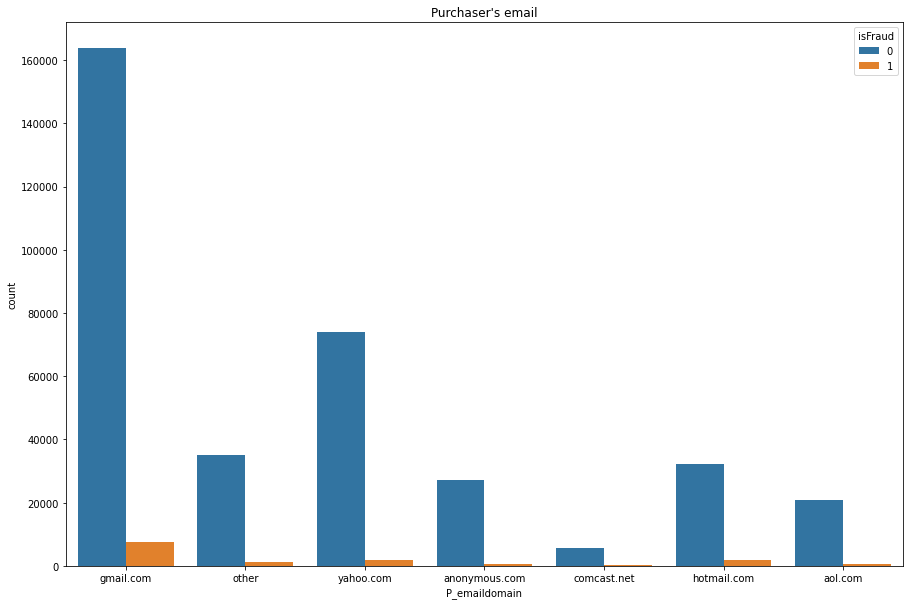

In [60]:
plt.figure(figsize=(15,10))
plt.title("Purchaser's email")
sns.countplot(data=df2,x='P_emaildomain',hue='isFraud')
plt.show()

In [61]:
print('Missing purchaser email domain - fraud constitute out of total fraud % : ',100*(df2[df2['P_emaildomain'].isnull()]['isFraud']==1).sum()/(df2['isFraud']==1).sum())
print('**************************************************')
for col in df2['P_emaildomain'].value_counts().index:
    print(col,'- fraud constitute out of total fraud % : ',100*(df2[df2['P_emaildomain']==col]['isFraud']==1).sum()/(df2['isFraud']==1).sum())
    print('**************************************************')



Missing purchaser email domain - fraud constitute out of total fraud % :  13.563915596567078
**************************************************
gmail.com - fraud constitute out of total fraud % :  47.98993353552301
**************************************************
yahoo.com - fraud constitute out of total fraud % :  11.137639543137382
**************************************************
other - fraud constitute out of total fraud % :  7.2788281602890885
**************************************************
hotmail.com - fraud constitute out of total fraud % :  11.673227076208299
**************************************************
anonymous.com - fraud constitute out of total fraud % :  4.078208685552043
**************************************************
aol.com - fraud constitute out of total fraud % :  3.0909208233851713
**************************************************
comcast.net - fraud constitute out of total fraud % :  1.1873265793379364
**********************************************

### Filling categorical data by randomly selecting one of the value from available unique values

In [62]:
print(df2['M6'].value_counts(),"\n\n")
print(df2['M6'].isnull().sum())

F    171103
T    145016
Name: M6, dtype: int64 


126786


In [64]:
for i in range(df2.shape[0]):
    if(pd.isna(df2.iloc[i]['M6'])):
        df2.at[i,'M6'] = 'F' if random.randint(0,1) == 0 else 'T'
        

- **Filled M6 feature missing value with 'T' and 'F' label**

In [65]:
print(df2['M6'].value_counts(),"\n\n")
print(df2['M6'].isnull().sum())

F    234678
T    208227
Name: M6, dtype: int64 


0


In [66]:
df2[categorical_cols].isnull().sum()

card4             1191
card6             1185
P_emaildomain    70931
M6                   0
ProductCD            0
dtype: int64

In [67]:
pemail_domains = df2['P_emaildomain'].value_counts().index

In [68]:
print(df2['P_emaildomain'].value_counts())
print(df2['P_emaildomain'].isnull().sum())

gmail.com        171189
yahoo.com         75850
other             36236
hotmail.com       33909
anonymous.com     27702
aol.com           21257
comcast.net        5831
Name: P_emaildomain, dtype: int64
70931


In [69]:
for i in range(df2.shape[0]):
    if(pd.isna(df2.iloc[i]['P_emaildomain'])):
        df2.at[i,'P_emaildomain'] = pemail_domains[random.randint(0,6)]
        

In [70]:
print(df2['P_emaildomain'].value_counts())
print(df2['P_emaildomain'].isnull().sum())

gmail.com        181408
yahoo.com         85983
other             46349
hotmail.com       43904
anonymous.com     37917
aol.com           31327
comcast.net       16017
Name: P_emaildomain, dtype: int64
0


- **Dropping card4 and card6 Null data because missing values are low**

In [71]:
df2.dropna(subset=['card4'],inplace=True)
df2.dropna(subset=['card6'],inplace=True)
# df2.reset_index()

In [72]:
df2[categorical_cols].isnull().sum()

card4            0
card6            0
P_emaildomain    0
M6               0
ProductCD        0
dtype: int64

In [73]:
df2.drop(axis=1,columns=['TransactionID'],inplace=True)

In [74]:
df2.drop(axis=1,columns=['addr2'],inplace=True)

In [75]:
gc.collect()

4338

In [76]:
df2[categorical_cols].nunique()

card4            4
card6            4
P_emaildomain    7
M6               2
ProductCD        5
dtype: int64

In [77]:
numerical_cols = []

for i in df2.columns:
    if(df2[i].dtype != 'o' and  df2[i].dtype !='O'):
        numerical_cols.insert(-1,i)

In [78]:
numeric_nulls = df2[numerical_cols].isnull().sum()
numeric_nulls_index = df2[numerical_cols].isnull().sum().index

In [79]:
df2.dropna(thresh=70,inplace=True)

- **Out of 110 features if any data point is having 40 or more missing value will be dropped**

In [80]:
df2.shape

(387400, 109)

**Filled mising values with Mode of that feature**

In [ ]:
df.info()

In [81]:
for i in numeric_nulls_index:
    if(df[i].dtype=='int32' or df[i].dtype=='int8' or df[i].dtype=='int16' or df[i].dtype=='int64'):
        df2[i].fillna(value=int(df2[i].mode()),inplace=True)

    if(df[i].dtype=='float32' or df[i].dtype=='float16' or df[i].dtype=='float64' or df[i].dtype=='float8'):
        df2[i].fillna(value=float(df2[i].mode()),inplace=True)
        

In [82]:
df2.shape

(387400, 109)

In [83]:
changeDType(df2)

**All the missing values handled**

**Scaling the features**

In [84]:
least_skewed_cols=[]
for i in numerical_cols:
    if(df2[i].skew()<1 and df2[i].skew()>-1):
        least_skewed_cols.append(i)

# for this columns i can use standardization to scale it

**Outlier Detection and removal**

In [85]:
numerical_cols = []

for i in df2.columns:
    if(df2[i].dtype != 'o' and  df2[i].dtype !='O'):
        numerical_cols.insert(-1,i)

In [87]:
train_rows = 26
train_cols = 4

# fig, ax = plt.subplots(nrows = boston_df_rows, ncols=boston_df_cols, figsize = (20,25) )
plt.figure(figsize=(25,150))
index=1
# ax= ax.flatten()
for col in numerical_cols:
    plt.subplot(train_rows,train_cols,index)
    sns.boxplot(x=df2[col])
    index += 1
plt.tight_layout(pad = 0.5,w_pad =0.7 , h_pad =5)

**Inference : Since all the data are very skewed (value distribution is very dense in some value range than other)**
**<br/><br/>Hence Inter quartile range proximity technique of outliers removal works best**

* ## Approach to solve the problem
- since data has **too many outliers** pridictive models which assign weights to the features may give biased results
- I will be using **pridictive ML models 1. Support Vector Machine 2. Logistic regression**
- We will also be using **Random forest (Tree based algorithm) as 2nd way**
- To handle imbalance in data using **stratified KFold cross validation will help mitigating overfitting**

In [89]:
## Testing

df2.shape

(387400, 109)

In [90]:
finalColumns = df2.columns

In [95]:
categoricals = getCategoricalColumns(df2)
numericals = getNumericalColumns(df2)

In [104]:
df2[categoricals].nunique()

card4            4
card6            4
P_emaildomain    7
M6               2
ProductCD        5
dtype: int64

In [105]:
df2.columns

Index(['isFraud', 'TransactionAmt', 'ProductCD', 'card1', 'card3', 'card4',
       'card5', 'card6', 'P_emaildomain', 'C1',
       ...
       'V290', 'V291', 'V300', 'V301', 'V302', 'V303', 'V312', 'V313', 'V314',
       'V315'],
      dtype='object', length=109)

In [ ]:
df2.to_csv()